# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">FILL IN TIME</span>
* A2. Gradient Orientation: <span style="color:red;">FILL IN TIME</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* B. Hough Transform (Circles):  <span style="color:red;">FILL IN TIME</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

In [392]:
import numpy as np
import cv2 as cv
from cv2 import *
import matplotlib.pyplot as plt
from scipy import *
from skimage import feature

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [402]:
# Part 1. Compute the Gradient Magnitude

def gradient(img):
    """
    helper function
    parameters: img, ndarray, image to dedect gradient on
    """
    img = np.copy(img)
    kernelx = np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])

    kernely = np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]])
    
    Gx = cv.filter2D(img, CV_64F, kernelx)
    Gy = cv.filter2D(img, CV_64F, kernely)
    gradient = np.sqrt(np.square(Gx) + np.square(Gy))
    
    return Gx, Gy, gradient, gradient_orientation(Gx, Gy)

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

In [542]:
# Part 2. Compute the Gradient Orientation

def gradient_orientation(Gx, Gy):
    """
    calculate gradient
    """
    return arctan2(Gy,Gx)

In [543]:
def display_a1(title='blocks.png'):
# Show your results on the blocks image
    img = imread(title, True)
    img = cvtColor(img, COLOR_BGR2GRAY)

    # Show your results on the blocks image
    Gx, Gy, grad, angles = gradient(img)

    plt.gray()
    ax1 = plt.subplot(131)
    ax1.set_title("Gx")
    ax2 = plt.subplot(132)
    ax2.set_title("Gy")
    ax3 = plt.subplot(133)
    ax3.set_title("Gradient")
    ax1.imshow(Gx)
    ax2.imshow(Gy)
    ax3.imshow(grad)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    plt.show()

    plt.imshow(angles, cmap="gray")
    plt.axis('off')
    plt.title("Angle of Gradients for " + title)
    plt.show()

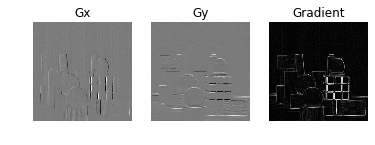

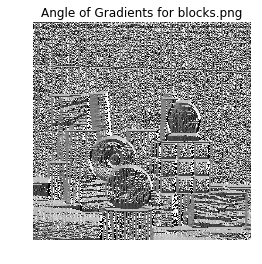

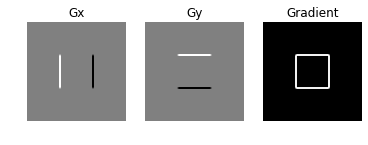

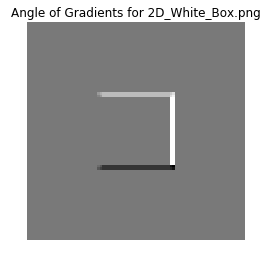

In [544]:
display_a1()
display_a1('2D_White_Box.png')

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



In [533]:
# Part 3. Find the Zero Crossings

def leplacian(img):
    """
    calculate the laplacian of an image
    """
    img = np.copy(img)
    l_kernel = np.array([[0,1,0], 
                         [1,-4,1], 
                         [0,1,0]])

    
    la = cv.filter2D(img, CV_64F, l_kernel)
    
    
    horizontal = np.zeros(img[:,1:].shape)
    ones = np.array([np.zeros(img.shape[0])]).T
    
    # Took all but right column and all but left column and compared them
    left = la[:,1:]
    right = la[:,:-1]
    horizontal[left*right < 0] = 1
    
    horizontal = np.hstack((horizontal, ones))  
    
    vertical = np.zeros(img[1:,:].shape)
    ones = np.zeros(img.shape[0])

    top = la[1:,:]
    bottom = la[:-1,:]
    vertical[bottom*top < 0] = 1
    
    vertical = np.vstack((vertical, ones))    
    
    return la, horizontal + vertical

In [534]:
def display_lap(title="blocks.png"):
    img = imread(title, True)
    img = cvtColor(img, COLOR_BGR2GRAY)
    la, zero_crossings = leplacian(img)
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.imshow(la, cmap="gray")
    ax1.set_title("Laplacian for " + title)
    
    ax2.imshow(zero_crossings, cmap="gray")
    ax2.set_title("Zeros Crossings for " + title)
    plt.show()

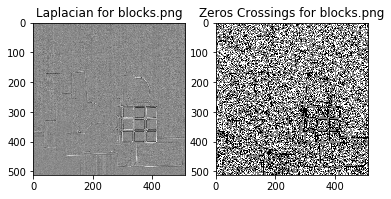

In [535]:
display_lap()
# display_lap('2D_White_Box.png')

In [536]:
# Part 4. Final Solution
def total_edges(img, thresh):
    img = np.copy(img)
    Gx, Gy, grad, angles = gradient(img)
    la, zeros = leplacian(img)
    
    # Masks the non-zero crossings and below the threshold
    mask = grad <= thresh
    
    zeros[mask] = 0
    
    return zeros, angles

In [537]:
def display(title="blocks.png"):
    thresh = 55
    img = imread(title, True)
    img = cvtColor(img, COLOR_BGR2GRAY)
    final, angles = total_edges(img, thresh)

    # Show the results on blocks image
    plt.imshow(final, cmap="gray")
    plt.axis('off')
    plt.title("Final Edges Detected")
    plt.show()

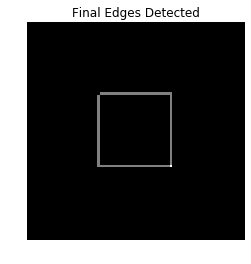

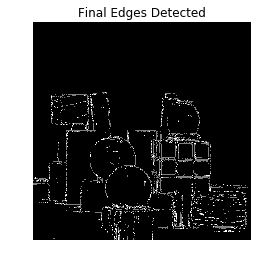

In [538]:
display('2D_White_Box.png')
display()

## Part A: Write-up


<span style="color:red">Please describe your results here and any questions, etc. above.</span>



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [576]:
# Part B - Hough Transform - code below
r1, r2, r3 = 16, 32, 48
def set_voting_maps(circle):
    """
    Generate Accumulators
    """
    bordersize = circle.shape[0]

    v1 = np.zeros(circle.shape)
    v1 = cv.copyMakeBorder(v1, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv.BORDER_CONSTANT, value=0 )

    v2 = np.zeros(circle.shape)
    v2 = cv.copyMakeBorder(v2, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv.BORDER_CONSTANT, value=0 )

    v3 = np.zeros(circle.shape)
    v3 = cv.copyMakeBorder(v3, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv.BORDER_CONSTANT, value=0 )
    
    return v1, v2, v3
    

def get_centers(edges, angles, v1, v2, v3, bordersize):
    """
    Fill accumulator with centers for corrisponding edges
    """
    # loop through pixels of the edges 
    for i, row in enumerate(edges):
        for j, pixel in enumerate(row):
            if(pixel != 0):
                n = i + bordersize
                m = j + bordersize
                
                # Just plot the points in y, x direction for each diameter
                theta = angles[i,j]
    
                x = n + int(np.sin(theta)*r1)
                y = m + int(np.cos(theta)*r1)
                v1[y, x] += 1 
                
                x = n - int(np.sin(theta)*r1)
                y = m - int(np.cos(theta)*r1)
                v1[y, x] += 1 
    
                x = n + int(np.sin(theta)*r2)
                y = m + int(np.cos(theta)*r2)
                v2[y, x] += 1 
                
                x = n - int(np.sin(theta)*r2)
                y = m - int(np.cos(theta)*r2)
                v2[y, x] += 1 
                
                x = n + int(np.sin(theta)*r3)
                y = m + int(np.cos(theta)*r3)
                v3[y, x] += 1 
                
                x = n - int(np.sin(theta)*r3)
                y = m - int(np.cos(theta)*r3)
                v3[y, x] += 1 

    return v1, v2, v3


# Be sure to show all of the figures required in the description above
def draw_circles(title='simplecircle.png', thresh=20):
    # Load in image
    img_dis = cv.blur(imread(title),(3,3))
    
    # Seperate color channels
    blue = img_dis[:,:,0]
    green = img_dis[:,:,1]
    red = img_dis[:,:,2]
    
    # Turn Gray
    img_og = cvtColor(img_dis, COLOR_BGR2GRAY)
    img = np.copy(img_og)

    bordersize = img.shape[0]
    
    # Generate Accumulators
    v1, v2, v3 = set_voting_maps(img)
    
    # Get angles for the gradients
    _, angles = total_edges(img, thresh) 
    
    # Get edges for each  
    edges = feature.canny(blue, sigma=3.5) + feature.canny(green, sigma=3.5) + feature.canny(red, sigma=3.5)

    # Set votes in accumulator
    v1, v2, v3 = get_centers(edges, angles, v1, v2, v3, bordersize)
    
    # blur the accumulators to allow for better mixing
    v1 = cv.blur(v1, (3,3))
    v2 = cv.blur(v2, (3,3))
    v3 = cv.blur(v3, (3,3))
    
    # make copies for the final display
    v1_img_total = cv.copyMakeBorder(img, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv.BORDER_CONSTANT, value=0)
    v2_img_total = np.copy(v1_img_total)
    v3_img_total = np.copy(v1_img_total)
    
    # Window size =  2*n + 1
    n = 4
    m = n + bordersize//2
    
    # Can with a n x n window for maximal suppression
    for i in range(m,len(v1)-m):
        for j in range(m, len(v1[0])-m):
            window = v1[i-n:i+n,j-n:j+n]
            window[window != np.max(window)] = 0
            
            window = v2[i-n:i+n,j-n:j+n]
            window[window != np.max(window)] = 0
            
            window = v3[i-n:i+n,j-n:j+n]
            window[window != np.max(window)] = 0
        
    
    # Draw circles on the images where the centers are above a certain threshhold
    for i, row in enumerate(v1):
        for j, pixel in enumerate(row):
            if(v1[i,j] > 2.5):
                cv.circle(v1_img_total, (i,j), r1, color=2, thickness=2)
            if(v2[i,j] > 2.5):
                cv.circle(v2_img_total, (i,j), r2, color=2, thickness=2)
            if(v3[i,j] > 2.1):
                cv.circle(v3_img_total, (i,j), r3, color=2, thickness=2)
  
    # Trim the images down
    v1_img_total = v1_img_total[bordersize:-bordersize,bordersize:-bordersize].astype('int').copy()
    v2_img_total = v2_img_total[bordersize:-bordersize,bordersize:-bordersize].astype('int').copy()
    v3_img_total = v3_img_total[bordersize:-bordersize,bordersize:-bordersize].astype('int').copy()
    
    # Print and plot results
    print("----32 Pixel Diameter----")
    alpha = .5
    v1 = v1[bordersize:-bordersize,bordersize:-bordersize]
    ax1 = plt.subplot(121)
    print("Max", np.max(v1))
    print("Mean", np.mean(v1))
    ax1.imshow(v1, cmap="gray")
    ax1.axis('off')
    ax1.set_title("Accum 1")
    
    ax2 = plt.subplot(122)
    ax2.imshow(v1_img_total)
    ax2.axis('off')
    ax2.set_title("Circles")
    plt.show()
    
    print("----64 Pixel Diameter----")
    v2 = v2[bordersize:-bordersize,bordersize:-bordersize]
    print("Max", np.max(v2))
    print("Mean", np.mean(v2))
    ax2 = plt.subplot(121)
    ax2.imshow(v2, cmap="gray")
    ax2.axis('off')
    ax2.set_title("Accum 2")
    
    ax2 = plt.subplot(122)
    ax2.imshow(v2_img_total)
    ax2.axis('off')
    ax2.set_title("Circles")
    plt.show()
    
    print("----64 Pixel Diameter----")
    v3 = v3[bordersize:-bordersize,bordersize:-bordersize]
    print("Max", np.max(v3))
    print("Mean", np.mean(v3))
    ax3 = plt.subplot(121)
    ax3.imshow(v3, cmap="gray")
    ax3.axis('off')
    ax3.set_title("Accum 3")
    
    ax2 = plt.subplot(122)
    ax2.imshow(v3_img_total)
    ax2.axis('off')
    ax2.set_title("Circles")
    
    plt.show()

----32 Pixel Diameter----
Max 8.88888888888889
Mean 0.008307562934027778


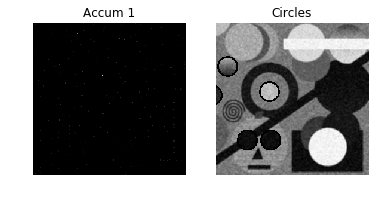

----64 Pixel Diameter----
Max 20.22222222222222
Mean 0.007720947265625


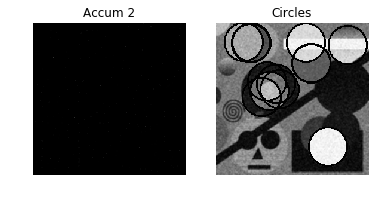

----64 Pixel Diameter----
Max 9.333333333333332
Mean 0.007220798068576387


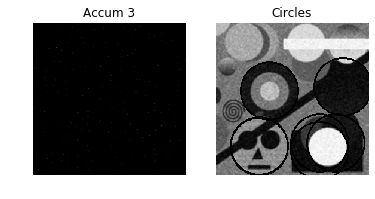

CPU times: user 20.6 s, sys: 535 ms, total: 21.1 s
Wall time: 21.1 s


In [578]:
%time draw_circles('circles.png')

##### Part B: Write-up

Using the combined edges detected from each color scheme of the image seemed to highlight all of the edges. 

When edges were detected a point was drawn in each accumulator for each radius 16, 32, 48 respectivley. After blurring the image, maximal suppression was used to suppress all the values that were not maximum values allowing me to filter out votes that were not for a good circle image.

Using a threshold for each radius image I was able to filter out most of the circles that were not actually on the image.
